In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
df= pd.read_csv("taylor_swift_spotify.csv")

In [27]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

# name (название): Это строка, представляющая название композиции или трека.
# album (альбом): Это строка, указывающая на название альбома, к которому принадлежит данный трек.
# release_date (дата выпуска): Это дата или строка, обозначающая дату выпуска трека или альбома.
# track_number (номер трека): Это целое число, обозначающее порядковый номер трека в альбоме.
# id (идентификатор): Это уникальный идентификатор для трека в системе, такой как Spotify ID или другой идентификатор, используемый в музыкальной платформе.
# uri (унифицированный идентификатор ресурса): Это строка, представляющая унифицированный идентификатор ресурса, который часто используется в API музыкальных сервисов для идентификации конкретного трека или ресурса.
# acousticness (акустичность): Это числовое значение, отражающее степень, в которой трек является акустическим. Значение близкое к 1 означает высокую степень акустичности, а значение близкое к 0 означает низкую степень акустичности.
# danceability (танцевальность): Это числовое значение, которое оценивает насколько подходит трек для танцев. Высокие значения указывают на более танцевальные треки.
# energy (энергия): Это числовое значение, описывающее интенсивность и активность трека. Высокие значения обычно соответствуют более энергичным трекам.
# instrumentalness (инструментальность): Это числовое значение, которое измеряет насколько в треке присутствует вокал. Значения близкие к 1 означают более инструментальные треки, а значения близкие к 0 указывают на большое присутствие вокала.
# liveness (живость): Это числовое значение, которое отражает вероятность наличия живых исполнений в записи. Значения близкие к 1 указывают на живое исполнение, а значения близкие к 0 указывают на студийную запись.
# loudness (громкость): Это числовое значение, обозначающее громкость трека. Отрицательные значения обычно означают более тихие треки, а положительные значения означают более громкие.
# speechiness (речь): Это числовое значение, оценивающее насколько трек содержит слова и речь. Значения близкие к 1 указывают на высокое содержание речи, а значения близкие к 0 указывают на отсутствие или низкое содержание речи.
# tempo (темп): Это числовое значение, обозначающее скорость трека, измеряемую в ударами в минуту (BPM).
# valence (валентность): Это числовое значение, которое описывает положительность или негативность трека. Большие значения обычно указывают на более позитивные треки, в то время как меньшие значения указывают на более негативные.
# popularity (популярность): Это числовое значение, оценивающее популярность трека на основе его потребления аудиторией или других метрик.
# duration_ms (длительность в миллисекундах): Это числовое значение, обозначающее длительность трека в миллисекундах.

In [62]:
df=df.drop(columns=["Unnamed: 0","id","uri","release_date"])
df.head(10)

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,260,3,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,66,212600
1,34,3,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,67,231833
2,209,3,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,68,231000
3,171,3,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,67,235800
4,11,3,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,65,193289
5,186,3,6,0.012100,0.636,0.808,0.000022,0.3590,-5.693,0.0729,160.058,0.917,65,219209
6,116,3,7,0.003540,0.670,0.858,0.000013,0.0687,-6.528,0.0439,118.009,0.539,65,207650
7,20,3,8,0.036200,0.618,0.683,0.000000,0.3050,-6.438,0.1940,169.971,0.363,64,211103
8,265,3,9,0.043600,0.589,0.674,0.000072,0.1120,-7.480,0.0656,139.985,0.514,65,220433
9,100,3,10,0.001960,0.758,0.691,0.000011,0.0939,-5.798,0.0515,119.997,0.538,64,247533


In [6]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,11.184906,0.319247,0.585285,0.574609,0.004005,0.163492,-7.505434,0.055889,122.332311,0.397379,59.411321,239978.624528
std,7.981060,0.327043,0.113121,0.191565,0.033163,0.142263,2.939040,0.070300,30.000272,0.199589,15.233056,46119.983031
min,1.000000,0.000184,0.243000,0.118000,0.000000,0.035700,-17.932000,0.023100,68.097000,0.037400,29.000000,83253.000000
25%,5.000000,0.036250,0.516000,0.443000,0.000000,0.096600,-9.222000,0.030325,96.939500,0.230000,46.000000,211813.000000
50%,10.000000,0.165000,0.595500,0.589500,0.000002,0.115000,-7.012000,0.037300,119.030000,0.385500,64.000000,235273.000000
75%,15.000000,0.653000,0.653000,0.729750,0.000056,0.163000,-5.361750,0.055225,143.934250,0.535000,71.000000,260361.000000
max,46.000000,0.971000,0.897000,0.950000,0.488000,0.931000,-1.909000,0.912000,208.918000,0.943000,96.000000,613026.000000


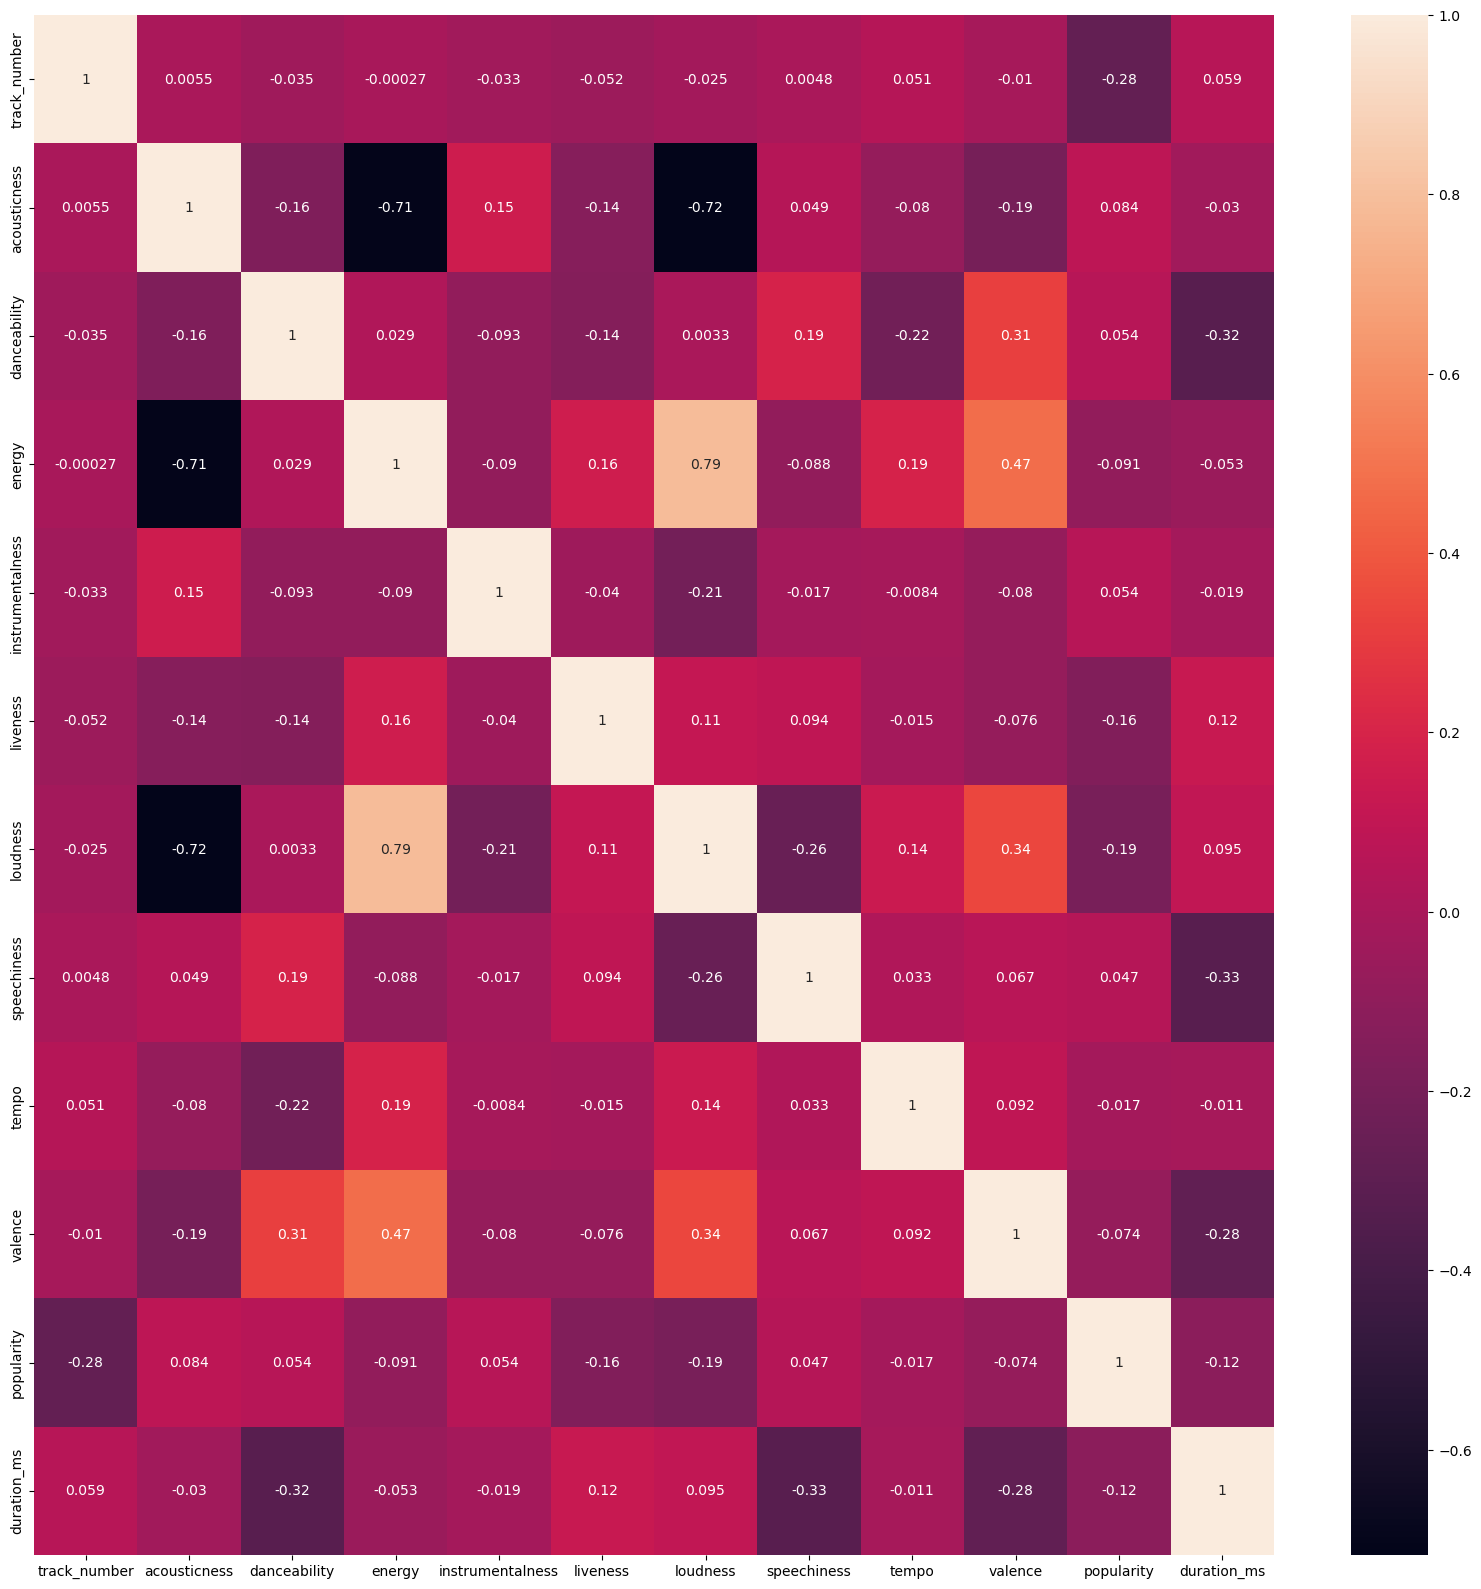

In [7]:
import seaborn as sns
mat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(mat,annot=True)
plt.show()

# акустика имеет большую обратную корелляцию с громкостью и энергичностью, что в целом вполне логично, для дальнейших действий проверю не дублируют ли эти атрибуты одну и ту же информацию

array([[<AxesSubplot:title={'center':'track_number'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>]], dtype=object)

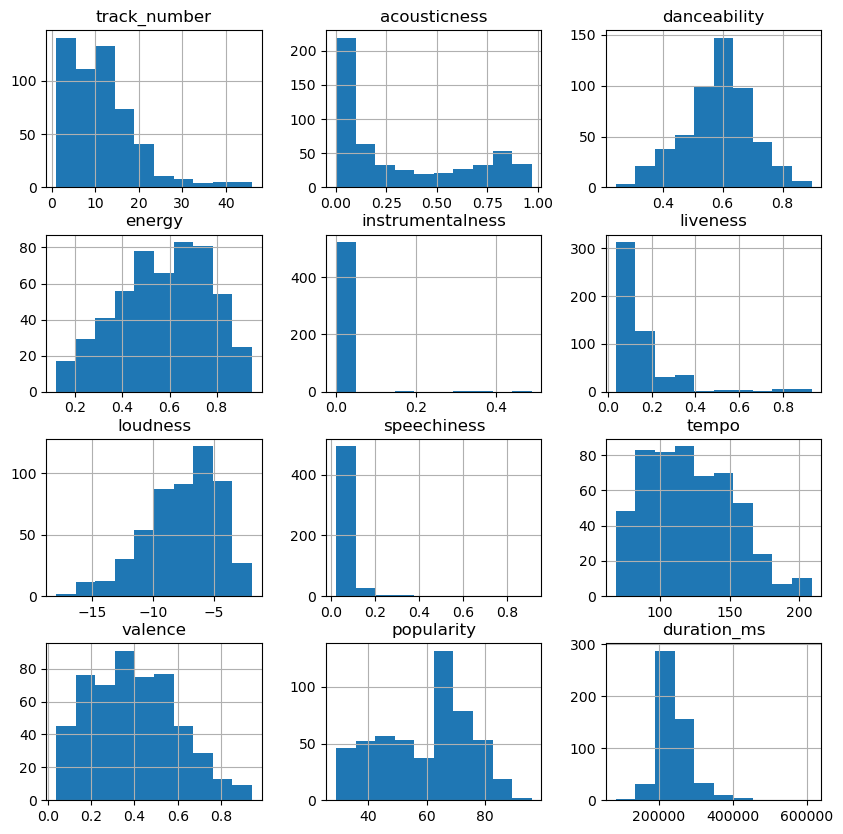

In [12]:
df.hist(figsize=(10,10))

# что спросить : 1 что мне делать дальше? удалить его?


<AxesSubplot:ylabel='popularity'>

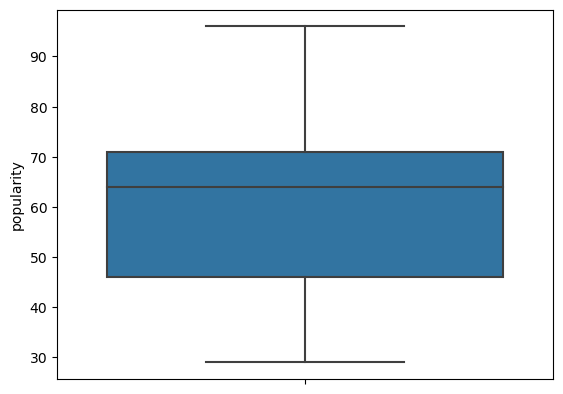

In [8]:
sns.boxplot(data=df,y="popularity")

# проверила атрибут на наличие выбросов

In [9]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [10]:
df.loc[(df['popularity']==96)]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
277,Cruel Summer,Lover,2019-08-23,2,0.117,0.552,0.702,0.000021,0.105,-5.707,0.157,169.994,0.564,96,178426


# самая популярная песня тейлор

In [14]:
df.dtypes

name                 object
album                object
release_date         object
track_number          int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

# что спросить: 2 вопросы про типы атрибутов

# что спросить: 3 encoders

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])
df['album'] = label_encoder.fit_transform(df['album'])

# дерево классификации

In [31]:
df1=df.copy()

In [32]:
for index, row in df1.iterrows():
    if row['popularity'] >= 59:
        df1.loc[index, 'popularity'] = 'high popularity'
    else:
        df1.loc[index, 'popularity'] = 'low popularity'

In [56]:
X = df1.drop('popularity', axis=1)  
y = df1["popularity"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
model = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=10, min_samples_leaf=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8301886792452831
Classification Report:
                 precision    recall  f1-score   support

high popularity       0.86      0.83      0.84        88
 low popularity       0.80      0.83      0.81        71

       accuracy                           0.83       159
      macro avg       0.83      0.83      0.83       159
   weighted avg       0.83      0.83      0.83       159



# что спросить: 4 недопустимые параметры

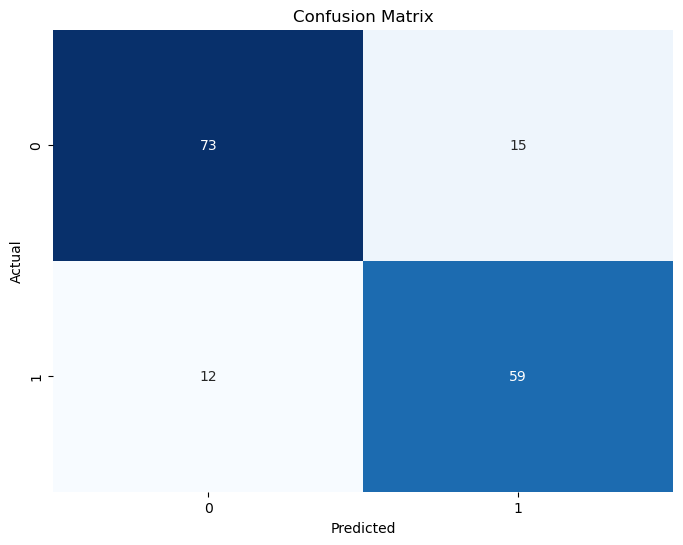

In [53]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Дерево регрессия

In [113]:
X = df.drop('popularity', axis=1)  
y = df["popularity"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
model =  DecisionTreeRegressor(max_depth=30,min_samples_split=29, min_samples_leaf=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 7.766323883093993


In [115]:
y_pred

array([69.3125    , 59.88888889, 57.23076923, 31.95      , 37.55555556,
       66.57142857, 55.3       , 74.66666667, 76.14285714, 59.88888889,
       74.66666667, 69.3125    , 66.57142857, 78.77777778, 37.55555556,
       48.45      , 74.66666667, 57.23076923, 69.3125    , 80.        ,
       47.7       , 59.        , 59.        , 70.125     , 31.95      ,
       57.23076923, 72.25      , 66.57142857, 67.27272727, 55.3       ,
       66.57142857, 72.25      , 63.84210526, 31.95      , 71.        ,
       66.57142857, 31.95      , 66.57142857, 71.        , 55.3       ,
       67.27272727, 48.45      , 80.        , 67.27272727, 76.14285714,
       80.        , 55.3       , 78.77777778, 70.125     , 66.57142857,
       47.7       , 54.25      , 42.26923077, 59.88888889, 74.66666667,
       67.27272727, 48.45      , 69.3125    , 48.45      , 63.84210526,
       55.3       , 76.14285714, 31.95      , 80.        , 66.57142857,
       60.5       , 74.66666667, 80.        , 59.88888889, 55.3 

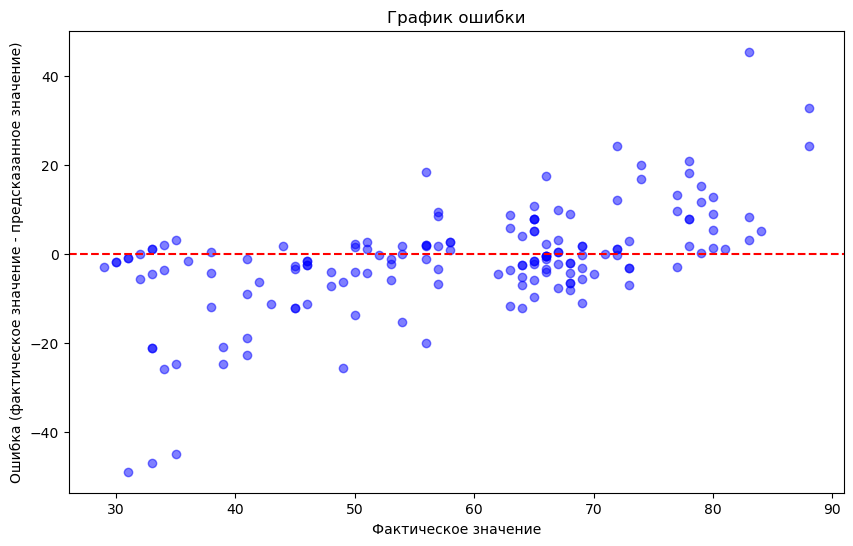

In [116]:
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, color='blue', alpha=0.5)
plt.xlabel('Фактическое значение')
plt.ylabel('Ошибка (фактическое значение - предсказанное значение)')
plt.title('График ошибки')
plt.axhline(y=0, color='r', linestyle='--') 
plt.show()